Shortcut          | Significado   
------------------|----------------
**CTRL + Enter**  | ejecutar celta 
**SHIFT + Enter** | ejecutar celda y pasar a siguiente
**ALT + Enter**   | ejecutar celda y crear una debajo

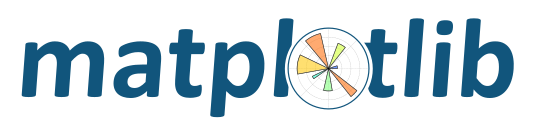

---

# matplotlib I - introducción a la visualización

_Una vez estudiada la sintaxis de Python y el manejo de datos numéricos, ha llegado el momento de visualizarlos. matplotlib es una biblioteca muy potente con la que se pueden crear gráficos de muy alta calidad y altamente personalizables._

**Objetivos**:
* Primer contacto con la visualización con matplotlib
* Uso de la interfaz pyplot
* Ploteo de gráficas, puntos discretos y contornos
* Personalización
* Ploteo múltiple
---

## ¿Qué es [matplotlib](https://matplotlib.org/)?

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz [`pyplot`](https://matplotlib.org/api/pyplot_summary.html) y orientada a objetos

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería:

In [ ]:
from IPython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

Haciendo click en cualquiera de las imágenes, se accede al código fuente que la ha generado, ejemplo:

In [ ]:
HTML('<iframe src="http://matplotlib.org/examples/pylab_examples/annotation_demo.html" width="800" height="600"></iframe>')

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, no se especifica sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero se pierde control.

### Función `plot`

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. 

La función más básica es la función [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Puede redibir una o dos listas:
* Con una sola lista se especifican los valores *y*, de manera automática los de *x* serán los números naturales
* Dos listas que especifican *x* e *y*. Naturalmente ambas deben tener la misma longitud

Lo más habitual con matplotlib es representar una función. Esto precisará que se defina un dominio en el cual evaluarla. Por ejemplo:

$$ f(x) = e^{-x^2} $$

Para el dominio se usa la función [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), que crea un vector de puntos equiespaciados:

Y la representación de la función añadiendo etiquetas y título:

Varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot
* Se puede añadir etiquetas, y escribir $\LaTeX$ en ellas, usando signos de dólar `$$`
* Añadiendo como argumento `label` se define una leyenda

### Personalización

#### Color y tipo de línea

La función `plot` acepta argumentos para personalizar el aspecto del plot. Con una letra se especifica el color, y con un símbolo el tipo de línea.

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

La lista de posibles argumentos y abreviaturas está disponible en la [documentación](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) de la función `plot`.

#### Límites de los ejes

No siempre interesa los límites por defecto. Para modificarlos se usa los comandos [`xlim`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim) e [`ylim`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim):

### Más personalización

Desde matplotlib 1.4 se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles:

Para activar uno de ellos, se usa `plt.style.use`. Para limitar el uso de un estilo a sólo una porción del código, debe crearse un bloque `with plt.style.context("STYLE")`:

Y hay otro tipo de personalización más curiosa:

¡Nunca imitar a XKCD fue tan fácil! http://xkcd.com/353/

### Función `scatter`

La función [`scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

Con `s` y `c` se modifican tamaño y color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

matplotlib trae por defecto muchos mapas de colores. En las [SciPy Lecture Notes](http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#colormaps) dan una lista de todos ellos:

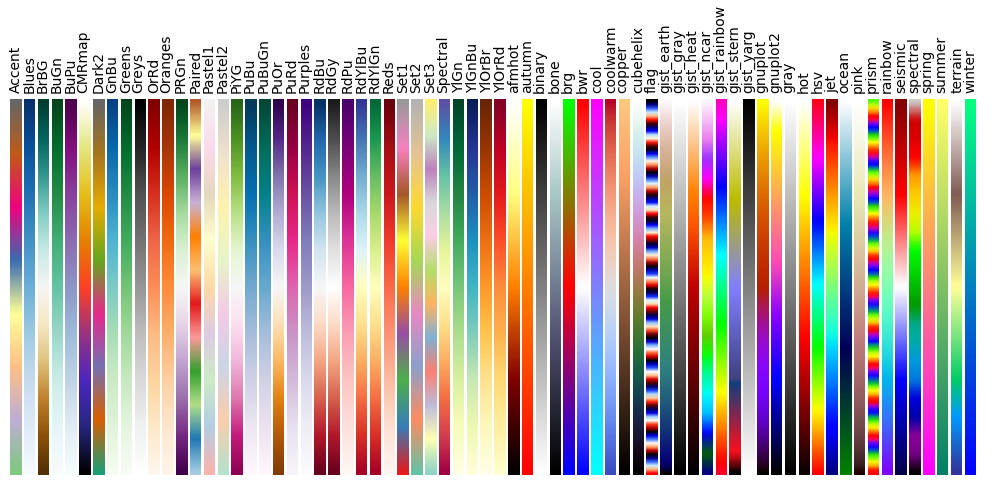

### Función `contour` 

La función [`contour`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour) se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función de mallado [`np.meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). Un ejemplo:

$$f(x) = x^2 - y^2$$

La función [`contourf`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) es casi idéntica pero rellena el espacio entre niveles, que se pueden especificar manualmente usando el cuarto argumento:

Para guardar las gráficas en archivos aparte se puede usar la función [`plt.savefig`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig). matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Más adelante se verá esto con más detalle con la interfaz orientada a objetos.

### Subplots

Para crear figuras con varios sistemas de ejes se pasa a [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) el número de filas y de columnas:

<div class="alert alert-info">¿Cómo se ajusta el espacio entre gráficas para que no se solapen los textos? En Google, "plt.subplot adjust", en el primer resultado tenemos la respuesta, cómo no en [StackOverflow](http://stackoverflow.com/a/9827848)</div>

Las figuras del plot previo está guardado en la variable `fig` mediante la función [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure), luego se puede recuperar para editarla:

##### Ejercicio

Crear una función que represente gráficamente esta expresión:

$$\sin(2 \pi f_1 t) + \sin(2 \pi f_2 t)$$

Siendo $f_1$ y $f_2$ argumentos de entrada (por defecto $10$ y $100$) y $t \in [0, 0.5]$. Además, debe mostrar:

* leyenda,
* título "Dos frecuencias",
* eje x "Tiempo ($t$)"

y usar algún estilo de los disponibles.

**Ejercicio**

Representar las curvas de nivel de esta función:

$$g(x, y) = \cos{x} + \sin^2{y}$$

Para obtener este resultado:

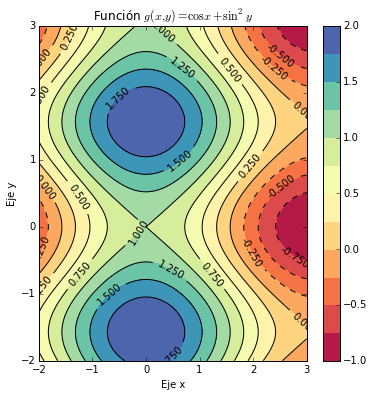

---
___Se ha visto:___
* matplotlib mediante la interfaz pyplot
* Representación de ecuaciones, datos discretos y contornos de ecuaciones de 2 variables
* Personalización de la visualización
* Uso de subplot para representar varias figuras
---
**Referencias**
* Guía de matplotlib para [principiantes](http://matplotlib.org/users/beginner.html)
* [Tutorial](http://pybonacci.org/tag/tutorial-matplotlib-pyplot/) de matplotlib en español
* [Referencia rápida](http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#quick-references) de matplotlib

---
[@AeroPython](https://github.com/aeropython): Juan Luis Cano, José Luis Cercos, Mabel Delgado, Alejandro Sáez, Andrés Quezada